<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/automl_may2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > 1) Introduction to EvalML </h1>

- **EvalML** is an AutoML library which builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.

#### Key Functionality

- **Automation**: Makes machine learning easier. Avoid training and tuning models by hand. Includes data quality checks, cross-validation and more.

- **Data Checks**: Catches and warns of problems with your data and problem setup before modeling.

- **End-to-end**: Constructs and optimizes pipelines that include state-of-the-art preprocessing, feature engineering, feature selection, and a variety of modeling techniques.

- **Model Understanding**: Provides tools to understand and introspect on models, to learn how they'll behave in your problem domain.

- **Domain-specific**: Includes repository of domain-specific objective functions and an interface to define your own.

### Reference:
 - https://github.com/alteryx/evalml
 - https://github.com/alteryx/evalml
 - https://evalml.alteryx.com/en/stable/install.html

In [ ]:
!pip install evalml

In [ ]:
! pip install dask[dataframe] --upgrade 

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 10px;' > 2) Load Required Libraries </h1>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

import evalml

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > 3) Read Data </h1>

In [3]:
from google.colab import drive
drive.mount('/ashok')

Drive already mounted at /ashok; to attempt to forcibly remount, call drive.mount("/ashok", force_remount=True).


In [4]:
# Check
with open('/ashok/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/ashok/My Drive/foo.txt'

Hello Google Drive!

In [5]:
train = pd.read_csv('/ashok/MyDrive/Colab_data_files/may2021/train.csv')
test = pd.read_csv('/ashok/MyDrive/Colab_data_files/may2021/test.csv')
sub = pd.read_csv('/ashok/MyDrive/Colab_data_files/may2021/sample_submission.csv')

In [ ]:
display(train.head(3))
display(test.head(3))
display(sub.head(3))

In [7]:
display(train.shape)
print("--------"*5)
display(test.shape)

(100000, 52)

----------------------------------------


(50000, 51)

In [ ]:
train.sample(10)

In [ ]:
display(train.info())
print('-'*80)
display(test.info())

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > 4) EDA (Exploratory Data Analysis) </h1>

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 4.1) Missing values </h1>

In [ ]:
print("Missing Values in Train:\n\n", train.isnull().sum())
print("\n\nMissing Values in Test:\n\n", test.isnull().sum())
train.isnull().sum().sum()

In [ ]:
display(train.describe().T)
display(test.describe().T)

In [12]:
train['target'].value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

#### a) Install EvalML (AutoML)
#### b) Configure search
#### c) Pipeline Rankings
#### d) Get pipeline
#### e) Select Best pipeline
#### f) Describe pipeline
#### g) Access raw results

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.1) Install EvalML (AutoML) </h1>

In [16]:
X = train.drop(columns=['target'])
y = train['target']

In [17]:
# binary classification --> problem_type='binary'
# multi classification --> problem_type='multiclass'

X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='multiclass')

In [18]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.2) Configure search </h1>

In [19]:
# automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
# automl = AutoMLSearch(X_train = X_train, y_train = y_train, problem_type='binary', max_batches=1, optimize_thresholds=True)

# objective="F1"              --> Binary Classification
# objective="F1 Micro"        --> Multiclass Classification  --> using micro averaging
# objective="F1 Macro"        --> Multiclass Classification  --> using macro averaging
# objective="F1 Weighted"     --> Multiclass Classification  --> using Weighted averaging

from evalml import AutoMLSearch

automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type="multiclass", objective="F1 Micro", 
                      allowed_model_families=['random_forest' , 'xgboost', 'lightgbm'],
                      additional_objectives=None, max_batches=5)
automl.search()

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1 Micro. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 5 batches for a total of 24 pipelines. 
Allowed model families: lightgbm, xgboost, random_forest



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Multiclass Classification Pipeline
Mode Baseline Multiclass Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.575

*****************************
* Evaluating Batch Number 1 *
*****************************

Random Forest Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.576
LightGBM Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.561
XGBoost Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.566

*****************************
* Evaluating Batch Number 2 *
*****************************

Random Forest Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.575
Random Forest Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.3) Pipeline Rankings </h1>

In [20]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,13,XGBoost Classifier w/ Imputer + Undersampler,0.577638,0.000544,0.578168,0.26625,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,20,Random Forest Classifier w/ Imputer + Undersam...,0.576337,0.000699,0.577080,0.13625,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,16,LightGBM Classifier w/ Imputer + Undersampler,0.575538,0.000430,0.575880,0.05625,False,{'Imputer': {'categorical_impute_strategy': 'm...
11,0,Mode Baseline Multiclass Classification Pipeline,0.574975,0.000009,0.574980,0.00000,False,{'Baseline Classifier': {'strategy': 'mode'}}


<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.4) Get pipeline </h1>

In [21]:
# We can get the object of any pipeline via their id as well:
pipeline = automl.get_pipeline(1)
print('Name:\n',pipeline.name)
print('\n\nParameters:\n\n', pipeline.parameters)

Name:
 Random Forest Classifier w/ Imputer + Undersampler


Parameters:

 {'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}


<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.5) Select Best pipeline </h1>

In [22]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = MulticlassClassificationPipeline(component_graph=[Imputer, Undersampler, XGBoostClassifier], parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1}, 'XGBoost Classifier':{'eta': 0.05671392060446587, 'max_depth': 2, 'min_child_weight': 8.125525342743984, 'n_estimators': 88}}, random_seed=0)

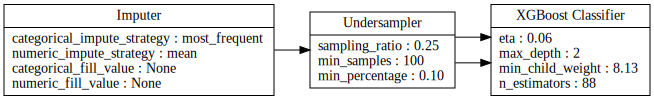

In [23]:
# We can also visualize the structure of our pipeline
best_pipeline.graph()

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.6) Describe pipeline </h1>

- Each **pipeline is given an id.** We can get more information about any **particular pipeline** using that id. Here, we will get more information about the **pipeline with id = 1.**

In [24]:
automl.describe_pipeline(3)


************************************************
* XGBoost Classifier w/ Imputer + Undersampler *
************************************************

Problem Type: multiclass
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
3. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100

Training
Training for multiclass problems.
Total training time (including CV): 129.0 seconds

Cross Validation
----------------
             F1 Micro  MCC Multiclass  Log Loss Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0               0.566           0.094                1.134     

#### If we are interested in see more details about the pipeline, we can describe it using the id from the rankings table:

In [25]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


************************************************
* XGBoost Classifier w/ Imputer + Undersampler *
************************************************

Problem Type: multiclass
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
3. XGBoost Classifier
	 * eta : 0.05671392060446587
	 * max_depth : 2
	 * min_child_weight : 8.125525342743984
	 * n_estimators : 88

Training
Training for multiclass problems.
Total training time (including CV): 48.8 seconds

Cross Validation
----------------
             F1 Micro  MCC Multiclass  Log Loss Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0               0.578           0

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.7) Access raw results </h1>

- The **AutoMLSearch** class records detailed results information under the results field, including information about the **cross-validation scoring and parameters.**

In [26]:
automl.results

{'pipeline_results': {0: {'cv_data': [{'all_objective_scores': OrderedDict([('F1 Micro',
                   0.5749803127460906),
                  ('MCC Multiclass', 0.0),
                  ('Log Loss Multiclass', 14.679659941497645),
                  ('AUC Weighted', 0.5),
                  ('AUC Macro', 0.5),
                  ('AUC Micro', 0.716653541830727),
                  ('Precision Weighted', 0.33060236004559224),
                  ('Precision Macro', 0.14374507818652266),
                  ('Precision Micro', 0.5749803127460906),
                  ('F1 Weighted', 0.4198177683493242),
                  ('F1 Macro', 0.18253571428571427),
                  ('Balanced Accuracy Multiclass', 0.25),
                  ('Accuracy Multiclass', 0.5749803127460906),
                  ('# Training', 53333),
                  ('# Validation', 26667)]),
     'binary_classification_threshold': None,
     'mean_cv_score': 0.5749803127460906},
    {'all_objective_scores': OrderedDict([('F1 M

In [27]:
# Evaluate on the test data
scores = best_pipeline.score(X_test, y_test, objectives=evalml.objectives.get_core_objectives('multiclass'))
print(f'Accuracy Binary: {scores["F1 Micro"]}')                                                                                              

Accuracy Binary: 0.5771


best_pipeline = automl.best_pipeline
best_pipeline.fit(X_train,y_train)
prediction = best_pipeline.predict(test)

In [28]:
best_pipeline.fit(X_train, y_train)
predictions_X_test = best_pipeline.predict(X_test)

In [29]:
predictions_test = best_pipeline.predict(test)

check_model = automl.load('model'.pkl)
check_model.predict_proba(X_test).to_dataframe()

from evalml.model_understanding.graphs import (
    graph_prediction_vs_actual, 
    #graph_feature_importance, 
    graph_confusion_matrix
)

graph_prediction_vs_actual(best_pipeline, X_test, y_test, "F1 Micro")

<h2 style=color:green align="left"> 5.7.1) Feature Importance </h2>

In [30]:
# graph_permutation_importance(best_pipeline, X_test, y_test, "F1")
best_pipeline.graph_feature_importance(importance_threshold=0)

<h2 style=color:green align="left"> 5.7.2) Confusion Matrix </h2>

In [31]:
graph_confusion_matrix(y_test, predictions_X_test)

NameError: ignored

from evalml.objectives.standard_metrics import AccuracyBinary, AUC, F1, PrecisionWeighted, Recall

#acc = AccuracyBinary()
auc = AUC()
f1 = F1()
pre_w = PrecisionWeighted()
rec = Recall()

print(f"Accuracy (Binary): {acc.score(y_true=y_test, y_predicted=predictions)}")
print(f"Area Under Curve: {auc.score(y_true=y_test, y_predicted=predictions)}")
print(f"F1: {f1.score(y_true=y_test, y_predicted=predictions)}")
print(f"Precision (Weighted): {pre_w.score(y_true=y_test, y_predicted=predictions)}")
print(f"Recall: {rec.score(y_true=y_test, y_predicted=predictions)}")

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;' > Submission </h1>

In [ ]:
sub['Survived'] = predictions_test.to_series()
sub.to_csv('submission.csv',index=False)
sub.head()

,id,Class_1,Class_2,Class_3,Class_4,Survived
0,100000,0.25,0.25,0.25,0.25,Class_2
1,100001,0.25,0.25,0.25,0.25,Class_2
2,100002,0.25,0.25,0.25,0.25,Class_2
3,100003,0.25,0.25,0.25,0.25,Class_2
4,100004,0.25,0.25,0.25,0.25,Class_2
